# Fake New Dectection

In [2]:
import numpy as np 
import pandas as pd
import re,string,unicodedata
import os

# NLP Libs
import nltk
from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
#from bs4 import BeautifulSoup

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#ML Algos
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [3]:
# Import our data

df=pd.read_csv('./fake-news-kaggleTrump/train.csv')
#train=pd.read_csv('./fake-news-kaggleTrump/train.csv')
#test=pd.read_csv('./fake-news-kaggleTrump/test.csv')

#true = pd.read_csv("True.csv")
#fake = pd.read_csv("Fake.csv")

# Data Analysis

In [4]:
print(df.shape)
#print(train.shape, test.shape)

(20800, 5)


In [5]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [6]:
#print(train.isnull().sum())
#print('************')
#print(test.isnull().sum())
print(df.isnull().sum())

id           0
title      558
author    1957
text        39
label        0
dtype: int64


In [7]:
#train.head()
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [8]:
#test.head()

In [9]:
# This will create a single column with all the relevant text
#test=test.fillna(' ')
#train=train.fillna(' ')
#test['total']=test['title']+' '+test['author']+' '+test['text']
#train['total']=train['title']+' '+train['author']+' '+train['text']

df=df.fillna(' ')
df['total']=df['title']+' '+df['author']+' '+df['text']

In [10]:
df.head()

,id,title,author,text,label,total
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


In [11]:
#test.head()

In [12]:
#train = train.drop(['id','title','author','text'],axis = 1)
#test = test.drop(['id','title','author','text'],axis = 1)

df = df.drop(['id','title','author','text'],axis = 1)

In [13]:
#train.head()
df.head()

,label,total
0,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,1,Why the Truth Might Get You Fired Consortiumne...
3,1,15 Civilians Killed In Single US Airstrike Hav...
4,1,Iranian woman jailed for fictional unpublished...


In [14]:
#test.head()

# Cleaning and preprocessing 

In [15]:
stop_words = stopwords.words('english')
lemmatizer=WordNetLemmatizer()
for index,row in df.iterrows():
    filter_sentence = ''
    
    sentence = row['total']
    sentence = re.sub(r'[^\w\s]','',sentence) #cleaning
    words = nltk.word_tokenize(sentence) #tokenization
    words = [w.lower() for w in words if not w in stop_words]  #stopwords removal
    
    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()
        
    df.loc[index,'total'] = filter_sentence

In [16]:
df.head()

,label,total
0,1,house dem aide we didnt even see comeys lette...
1,0,flynn hillary clinton big woman campus breitb...
2,1,why truth might get you fired consortiumnewsc...
3,1,15 civilian killed in single u airstrike have...
4,1,iranian woman jailed fictional unpublished st...


# Vectorization

In [17]:
X_train = df['total']
Y_train = df['label']

In [18]:
#Feature extraction using count vectorization and tfidf.
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [19]:
tf_idf_matrix

<20800x202501 sparse matrix of type '<class 'numpy.float64'>'
	with 5898836 stored elements in Compressed Sparse Row format>

# Modeling

In [20]:
test_counts = count_vectorizer.transform(df['total'].values)
test_tfidf = tfidf.transform(test_counts)

#split in samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, Y_train, random_state=0)

In [21]:
print(X_train.shape, X_test.shape)

(15600, 202501) (5200, 202501)


In [22]:
print(y_train.shape, y_test.shape)

(15600,) (5200,)


In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Logistic Regression

Accuracy of Logistic classifier on training set: 1.00
Accuracy of Logistic classifier on test set: 0.98
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2564
           1       0.97      0.98      0.98      2636

    accuracy                           0.98      5200
   macro avg       0.98      0.98      0.98      5200
weighted avg       0.98      0.98      0.98      5200



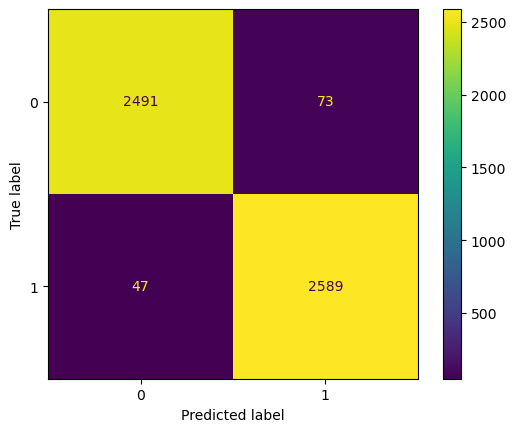

In [24]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)
print('Accuracy of Logistic classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))
cm = confusion_matrix(y_test, pred)
cm
ConfusionMatrixDisplay.from_predictions(y_test,pred)
print(classification_report(y_test, pred))